
# **Análise da Taxa SELIC e IPCA**

**Nome:** Luis Carlos Moreira Duarte  
**LinkedIn:** [Luis Carlos Duarte](https://www.linkedin.com/in/luis-duarte-560993291/)  
**E-mail:** luiscmduarte077@gmail.com  

---

## **Fonte dos Dados**
Os dados utilizados neste trabalho foram obtidos a partir do **Sistema Gerenciador de Séries Temporais (SGS)**, disponibilizado pelo **Banco Central do Brasil**. As séries analisadas são:

1. **Taxa SELIC** (código 11): Taxa de juros básica da economia, com periodicidade diária.
2. **IPCA** (código 433): Índice Nacional de Preços ao Consumidor Amplo, medido em variação percentual mensal.

Os dados abrangem o período de **2000 a 2024**, o que nos permitirá observar tendências de longo prazo e identificar eventos macroeconômicos relevantes.

---

**Objetivos:**
1. Limpar e preparar os dois datasets (SELIC e IPCA).
2. Converter os dados para formatos numéricos e temporais adequados.
3. Preparar os datasets para análises comparativas.
---


## **Preparação dos Dados**
Nesta etapa, realizaremos as seguintes ações:  
1. **Carregamento dos dados brutos:** os arquivos CSV contendo as séries históricas.  
2. **Inspeção inicial:** identificação de problemas como valores ausentes ou entradas não numéricas.  
3. **Limpeza e ajustes:**  
   - Substituição de separadores (vírgula para ponto).  
   - Conversão das datas para o formato apropriado.  
   - Exclusão de linhas inválidas ou inconsistentes.  

4. **Estruturação final:** dados prontos para análises e visualizações.

**Bloco 1 - Carregamento e Preparação:**
Por aqui, fazemos o carregamento, limpeza e organização inicial dos dados.

**Passo 1: Importar Bibliotecas**


In [1]:
# Importando bibliotecas necessárias
import pandas as pd
from google.colab import files

**Passo 2: Upload dos Arquivos**

In [2]:
# Fazer upload dos arquivos
print("Por favor, faça o upload dos dois arquivos: SELIC e IPCA.")
uploaded = files.upload()

Por favor, faça o upload dos dois arquivos: SELIC e IPCA.


Saving STP-20241224181029538.csv to STP-20241224181029538.csv
Saving STP-20241224180546170.csv to STP-20241224180546170.csv


**Passo 3: Carregar os Datasets**

Com os arquivos carregados, vamos agora ler os dados para o ambiente. O primeiro arquivo contém as informações da Taxa SELIC, e o segundo, os dados do IPCA. Ambos os arquivos serão convertidos para DataFrames, uma estrutura do Pandas que organiza os dados em tabelas, com linhas e colunas, facilitando a manipulação e análise.



In [3]:
# Carregar os datasets
files_list = list(uploaded.keys())  # Obter os nomes dos arquivos carregados
selic_data_raw = pd.read_csv(files_list[0], encoding='latin1', sep=';')  # Carregar o primeiro arquivo
ipca_data_raw = pd.read_csv(files_list[1], encoding='latin1', sep=';')  # Carregar o segundo arquivo

# Visualizar os nomes originais das colunas
print("\nNomes das colunas originais no dataset SELIC:")
print(selic_data_raw.columns)

print("\nNomes das colunas originais no dataset IPCA:")
print(ipca_data_raw.columns)


Nomes das colunas originais no dataset SELIC:
Index(['Data', '433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal'], dtype='object')

Nomes das colunas originais no dataset IPCA:
Index(['Data', '11 - Taxa de juros - Selic - % a.d.'], dtype='object')


**Passo 4: Ajustar Nomes das Colunas**

E é aqui que ajustaremos os nomes das colunas para que fiquem mais claros, simples e também fáceis de trabalhar. Enquanto a coluna de  de datas continuará sendo chamada de Data, nossas variáveis principais de análise serão renomeadas para SELIC_Taxa e IPCA_Variacao .



In [4]:
# Ajustar os nomes das colunas
selic_data_raw.columns = ['Data', 'SELIC_Taxa']
ipca_data_raw.columns = ['Data', 'IPCA_Variacao']

# Mostrar os nomes ajustados
print("\nNomes das colunas ajustados no dataset SELIC:")
print(selic_data_raw.columns)

print("\nNomes das colunas ajustados no dataset IPCA:")
print(ipca_data_raw.columns)


Nomes das colunas ajustados no dataset SELIC:
Index(['Data', 'SELIC_Taxa'], dtype='object')

Nomes das colunas ajustados no dataset IPCA:
Index(['Data', 'IPCA_Variacao'], dtype='object')


**Passo 5: Conversão de Valores Numéricos**

Os valores numéricos nos datasets estão no formato brasileiro, ou seja com vírgulas como separador decimal. É melhor, a gente converter essas vírgulas para pontos e transformar os valores em números no formato internacional

In [5]:
# Substituir vírgulas por pontos e converter para float
selic_data_raw['SELIC_Taxa'] = pd.to_numeric(selic_data_raw['SELIC_Taxa'].str.replace(',', '.', regex=False), errors='coerce')
ipca_data_raw['IPCA_Variacao'] = pd.to_numeric(ipca_data_raw['IPCA_Variacao'].str.replace(',', '.', regex=False), errors='coerce')


**Passo 6: Formatar as Datas**

As datas nos dois datasets estão em formatos diferentes. No dataset SELIC, elas estão no formato dia/mês/ano, enquanto no dataset IPCA, estão em mês/ano. Precisamos ajustar esses formatos para que sejam reconhecidos corretamente.


In [6]:
# Converter as datas
selic_data_raw['Data'] = pd.to_datetime(selic_data_raw['Data'], format='%m/%Y', errors='coerce')  # SELIC usa mês/ano
ipca_data_raw['Data'] = pd.to_datetime(ipca_data_raw['Data'], format='%d/%m/%Y', errors='coerce')  # IPCA usa dia/mês/ano

**Passo 7: Limpeza dos Dados**

Com as datas e os valores numéricos corrigidos, agora removemos quaisquer linhas com dados inválidos, como valores ausentes ou mal formatados, para garantir a integridade da análise.

In [7]:
# Excluir linhas inválidas
selic_data_cleaned = selic_data_raw.dropna(subset=['Data', 'SELIC_Taxa'])
ipca_data_cleaned = ipca_data_raw.dropna(subset=['Data', 'IPCA_Variacao'])

**Passo 8: Exibir Dados Limpos**

Por fim, verificamos os datasets limpos. O dataset SELIC agora contém 299 registros, enquanto o dataset IPCA possui 6275 registros. Aqui estão algumas prévias dos dados finais.

In [8]:
# Mostrar os tamanhos finais dos datasets
print(f"Tamanho do dataset SELIC após limpeza: {len(selic_data_cleaned)} linhas")
print(f"Tamanho do dataset IPCA após limpeza: {len(ipca_data_cleaned)} linhas")

# Mostrar exemplos limpos
print("\nPrévia do Dataset SELIC Limpo:")
print(selic_data_cleaned.head())

print("\nPrévia do Dataset IPCA Limpo:")
print(ipca_data_cleaned.head())

Tamanho do dataset SELIC após limpeza: 299 linhas
Tamanho do dataset IPCA após limpeza: 6275 linhas

Prévia do Dataset SELIC Limpo:
        Data  SELIC_Taxa
0 2000-01-01        0.62
1 2000-02-01        0.13
2 2000-03-01        0.22
3 2000-04-01        0.42
4 2000-05-01        0.01

Prévia do Dataset IPCA Limpo:
        Data  IPCA_Variacao
0 2000-01-03       0.069186
1 2000-01-04       0.069186
2 2000-01-05       0.069220
3 2000-01-06       0.069286
4 2000-01-07       0.069286


**Bloco 2 - Visualizando Dataset SELIC**

Vamos começar visualizando a Taxa SELIC ao longo do período de 2000 a 2024. A SELIC é a principal ferramenta de política monetária utilizada pelo Banco Central do Brasil para regular o comportamento da economia, influenciando o custo do crédito, os investimentos e o consumo.

Entre 2002 e 2005, observamos um pico significativo na SELIC, com níveis superiores a 20%~25%. (Mostrar) Esse movimento reflete uma estratégia agressiva do Banco Central para conter a inflação elevada e atrair capital estrangeiro em um contexto de instabilidade econômica, marcada por incertezas políticas na eleição presidencial e desvalorização cambial da nossa moeda.
(https://veja.abril.com.br/economia/em-20-anos-selic-so-tinha-tido-aumento-de-1-ponto-percentual-na-pandemia)

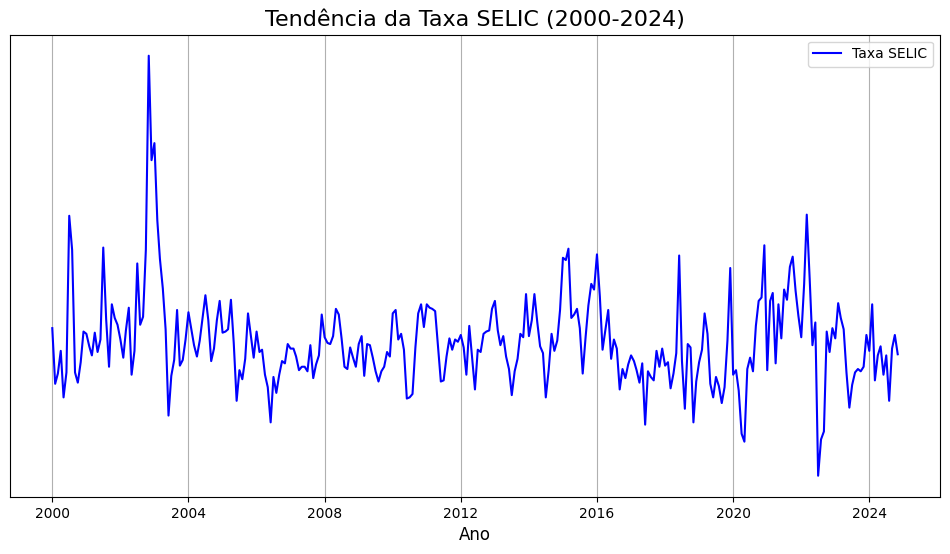

In [9]:
import matplotlib.pyplot as plt

# Verificar se o dataset não está vazio
if len(selic_data_cleaned) > 0:
    plt.figure(figsize=(12, 6))
    plt.plot(selic_data_cleaned['Data'], selic_data_cleaned['SELIC_Taxa'], label='Taxa SELIC', color='blue')
    plt.title('Tendência da Taxa SELIC (2000-2024)', fontsize=16)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Taxa SELIC', fontsize=12)
    plt.gca().get_yaxis().set_visible(False)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()
else:
    print("O dataset SELIC está vazio após a limpeza.")


**Bloco 3 - Visualizando Dataset IPCA**

Agora, vamos analisar o gráfico do IPCA, que mostra a variação mensal da inflação oficial no Brasil ao longo do período de 2000 a 2024. O IPCA mede o comportamento dos preços ao consumidor, servindo como um indicador do custo de vida e do poder de compra da população.

Podemos identificar momentos críticos no comportamento desse índice. Como Por exemplo, entre 2010 e 2011, houve uma aceleração no IPCA devido ao aumento nos preços de commodities, alimentos e energia, impulsionados pelo cenário global de alta demanda e choques climáticos. Outro período marcante ocorreu em 2015, quando a inflação aumentou drasticamente, refletindo a combinação de uma grave crise econômica e política interna, ajustes tarifários, e, novamente, a desvalorização cambial da nossa moeda. (https://g1.globo.com/economia/noticia/2015/12/economia-em-2015-o-ano-em-que-o-brasil-andou-para-tras.html)


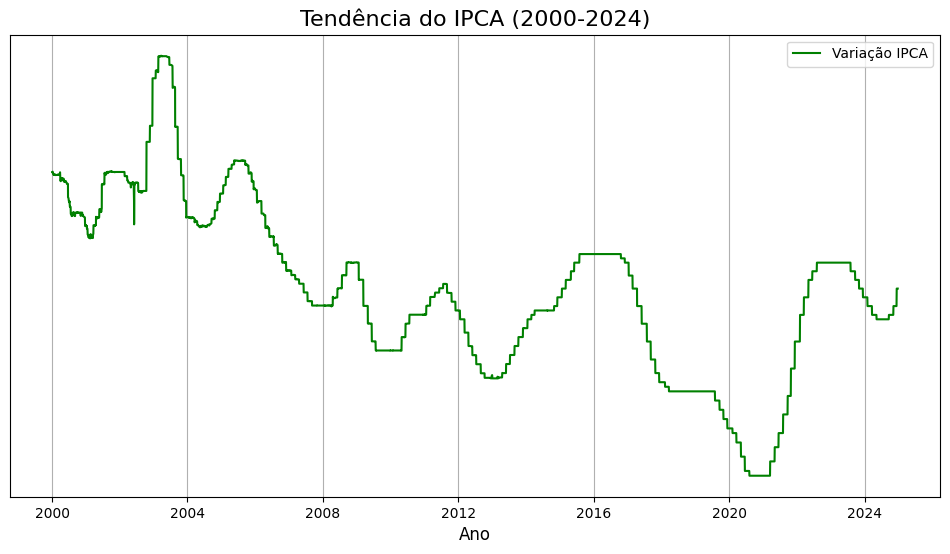

In [12]:
# Verificar se o dataset não está vazio
if len(ipca_data_cleaned) > 0:
    plt.figure(figsize=(12, 6))
    plt.plot(ipca_data_cleaned['Data'], ipca_data_cleaned['IPCA_Variacao'], label='Variação IPCA', color='green')
    plt.title('Tendência do IPCA (2000-2024)', fontsize=16)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('IPCA', fontsize=12)
    plt.gca().get_yaxis().set_visible(False)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()
else:
    print("O dataset IPCA está vazio após a limpeza.")


**Sopreposição - SELIC e IPCA**

Agora, analisando  a interação entre ambos os índices ao longo do tempo, representados de forma sobreposta
Vamos entender por definitivo o que são: a SELIC, como taxa básica de juros, é a principal ferramenta de política monetária no Brasil, utilizada para influenciar o custo do crédito, controlar a inflação e estabilizar a economia. (Mostrar)Já o IPCA mede a variação dos preços ao consumidor, refletindo diretamente o custo de vida e os efeitos de choques econômicos internos e externos.



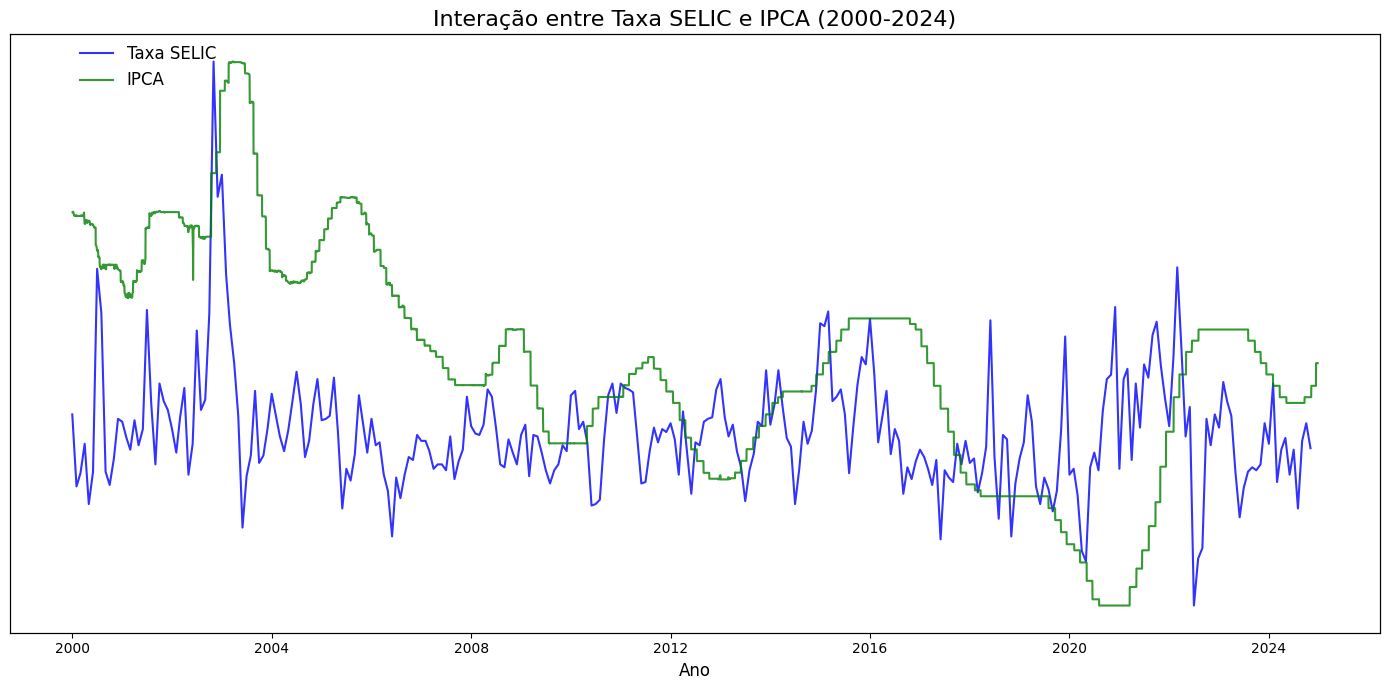

In [11]:
import matplotlib.pyplot as plt

# Criar figura e eixo principal
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico SELIC no eixo principal
ax1.plot(selic_data_cleaned['Data'], selic_data_cleaned['SELIC_Taxa'], label='Taxa SELIC', color='blue', alpha=0.8, linewidth=1.5)
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('SELIC', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.get_yaxis().set_visible(False)  # Remove números do eixo Y do SELIC

# Criar um segundo eixo Y para o IPCA
ax2 = ax1.twinx()
ax2.plot(ipca_data_cleaned['Data'], ipca_data_cleaned['IPCA_Variacao'], label='IPCA', color='green', alpha=0.8, linewidth=1.5)
ax2.set_ylabel('IPCA', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.get_yaxis().set_visible(False)

# Ajustar a posição da legenda
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left", bbox_to_anchor=(0.05, 0.95), fontsize=12, frameon=False)

# Adicionar título e ajustar layout
plt.title('Interação entre Taxa SELIC e IPCA (2000-2024)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()  # Ajusta automaticamente para evitar sobreposição
plt.show()


Aqui, podemos observar períodos importantes em que os dois índices se influenciam diretamente. Em 2002, às vésperas das eleições presidenciais, a SELIC foi elevada para conter a instabilidade cambial, enquanto o IPCA registrou oscilações relacionadas ao aumento nos custos de importação. Outro momento relevante ocorreu entre 2012 e 2013, quando o Banco Central reduziu a SELIC em uma tentativa de estimular a economia após crise financeiras globais, mas isso contribuiu para um aumento moderado no IPCA.

Mais recentemente, em 2020, durante a pandemia de COVID-19, a SELIC atingiu um patamar super baixo como forma de estimular a economia. Contudo, em 2021, a pressão inflacionária gerada por fatores globais, como a alta dos combustíveis e problemas nas cadeias de suprimento, levou a um aumento gradual na SELIC, evidenciando a necessidade de reequilibrar os preços.

## **Conclusão:**
Por fim, a dinâmica entre a SELIC e IPCA evidencia como decisões de política monetária influenciam diretamente o comportamento da inflação e o equilíbrio econômico do país através de flutuações anuais, mensais ou até mesmo diárias, muitas vezes refletindo choques externos ou sazonais. Entender essa relação é essencial para interpretar o cenário econômico e antecipar mudanças em ciclos financeiros